In [674]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

#### Preparing train dataset

In [675]:
raw_df = pd.read_csv("train.csv")
df=raw_df.copy()
obj_df = pd.read_csv("df_objwoi.csv")
obj_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5,2,0,3,3,1,1,2,16,4,...,0,0,0,1,0,0,0,0,1,0
1,5,2,0,3,3,1,0,2,20,2,...,0,0,0,1,0,0,0,0,1,0
2,5,2,0,2,3,1,1,2,16,4,...,0,0,0,1,0,0,0,0,1,0
3,5,2,0,2,3,1,3,2,17,4,...,0,0,0,1,1,0,0,0,0,0
4,5,2,0,2,3,1,0,2,24,4,...,0,0,0,1,0,0,0,0,1,0


In [676]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [677]:
col_list = list(df.select_dtypes(include=['object']).columns)

In [678]:
df.drop(col_list, axis=1, inplace=True)

In [679]:
df = pd.concat([df,obj_df], axis=1)

In [680]:
raw_test = pd.read_csv("test.csv")
test_df=raw_test.copy()
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [681]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [682]:
test_obj  = test_df.select_dtypes(include=['object'])

In [683]:
test_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1455 non-null   object
 1   Street         1459 non-null   object
 2   Alley          107 non-null    object
 3   LotShape       1459 non-null   object
 4   LandContour    1459 non-null   object
 5   Utilities      1457 non-null   object
 6   LotConfig      1459 non-null   object
 7   LandSlope      1459 non-null   object
 8   Neighborhood   1459 non-null   object
 9   Condition1     1459 non-null   object
 10  Condition2     1459 non-null   object
 11  BldgType       1459 non-null   object
 12  HouseStyle     1459 non-null   object
 13  RoofStyle      1459 non-null   object
 14  RoofMatl       1459 non-null   object
 15  Exterior1st    1458 non-null   object
 16  Exterior2nd    1458 non-null   object
 17  MasVnrType     1443 non-null   object
 18  ExterQual      1459 non-null

In [684]:
def valcount_isnull(data, variable):
    listv = data[variable].value_counts()
    lists = data[variable].isnull().sum()
    print(listv)
    print("Null sum..: ", lists)

#### MSZoning

In [685]:
valcount_isnull(test_obj, 'MSZoning')

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64
Null sum..:  4


In [686]:
test_df[test_df['MSZoning'].isnull() == True ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

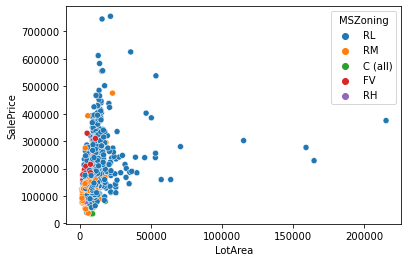

In [687]:
sns.scatterplot(x="LotArea", y="SalePrice", hue="MSZoning", data=raw_df)

In [688]:
test_obj.MSZoning.fillna(4, inplace=True)
dictionary = {"MSZoning":{"C (all)":1,"RH":2, "FV":3, "RM":4, "RL":5}}
test_obj = test_obj.replace(dictionary)

In [689]:
test_obj.isnull().sum()

MSZoning            0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64

In [690]:
valcount_isnull(test_obj, 'MSZoning')

5    1114
4     246
3      74
1      15
2      10
Name: MSZoning, dtype: int64
Null sum..:  0


#### Street

In [691]:
valcount_isnull(test_obj, 'Street')

Pave    1453
Grvl       6
Name: Street, dtype: int64
Null sum..:  0


In [692]:
dictionary = {"Street":{"Grvl":1,"Pave":2}}
test_obj = test_obj.replace(dictionary)

#### Alley

In [693]:
valcount_isnull(test_obj, 'Alley')

Grvl    70
Pave    37
Name: Alley, dtype: int64
Null sum..:  1352


In [694]:
test_obj.Alley.fillna(0, inplace=True)
dictionary = {"Alley":{"Grvl":1,"Pave":2}}
test_obj = test_obj.replace(dictionary)

In [695]:
valcount_isnull(test_obj, 'Alley')

0    1352
1      70
2      37
Name: Alley, dtype: int64
Null sum..:  0


#### LotShape

In [696]:
valcount_isnull(test_obj, 'LotShape')

Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64
Null sum..:  0


In [697]:
dictionary = {"LotShape":{"IR3":0,"IR2":1, "IR1":2, "Reg":3}}
test_obj = test_obj.replace(dictionary)

#### LandContour

In [698]:
valcount_isnull(test_obj, 'LandContour')

Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64
Null sum..:  0


In [699]:
dictionary = {"LandContour":{"Bnk":0,"Low":1, "HLS":2, "Lvl":3}}
test_obj = test_obj.replace(dictionary)

#### Utilities

In [700]:
valcount_isnull(test_obj, 'Utilities')

AllPub    1457
Name: Utilities, dtype: int64
Null sum..:  2


In [701]:
test_df[test_df.Utilities.isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
485,1946,20,RL,NaN,31220,Pave,NaN,IR1,Bnk,NaN,...,0,0,NaN,NaN,Shed,750,5,2008,WD,Normal


In [702]:
raw_df[raw_df.Utilities == 'NoSeWa']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
944,945,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


In [703]:
test_obj.Utilities.fillna(1, inplace=True)
dictionary = {"Utilities":{"NoSeWa":0,"AllPub":1}}
test_obj = test_obj.replace(dictionary)

#### LotConfig

In [704]:
valcount_isnull(test_obj, 'LotConfig')

Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64
Null sum..:  0


In [705]:
dictionary = {"LotConfig":{"FR2":0,"Inside":1, "FR3":2, "Corner":3, "CulDSac":4}}
test_obj = test_obj.replace(dictionary)

#### LandSlope

In [706]:
valcount_isnull(test_obj, 'LandSlope')

Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64
Null sum..:  0


In [707]:
dictionary = {"LandSlope":{"Sev":0,"Mod":1, "Gtl":2}}
test_obj = test_obj.replace(dictionary)

#### Neighborhood

In [708]:
valcount_isnull(test_obj, 'Neighborhood')

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
NPkVill     14
BrDale      14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64
Null sum..:  0


In [709]:
categories=pd.Categorical(test_obj['Neighborhood'],
                          categories=['MeadowV','IDOTRR','BrDale','BrkSide','Edwards','OldTown',
                                     'Sawyer','Blueste','SWISU','NPkVill','NAmes','Mitchel','SawyerW','NWAmes',
                                     'Gilbert','Blmngtn','CollgCr','Crawfor','ClearCr','Somerst','Veenker',
                                     'Timber','StoneBr','NridgHt','NoRidge'],ordered=True)
print(categories)

['NAmes', 'NAmes', 'Gilbert', 'Gilbert', 'StoneBr', ..., 'MeadowV', 'MeadowV', 'Mitchel', 'Mitchel', 'Mitchel']
Length: 1459
Categories (25, object): ['MeadowV' < 'IDOTRR' < 'BrDale' < 'BrkSide' ... 'Timber' < 'StoneBr' < 'NridgHt' < 'NoRidge']


In [710]:
Neighborhood,unique=pd.factorize(categories,sort=True)
test_obj['Neighborhood']=Neighborhood
test_obj['Neighborhood']

0       10
1       10
2       14
3       14
4       22
        ..
1454     0
1455     0
1456    11
1457    11
1458    11
Name: Neighborhood, Length: 1459, dtype: int64

#### Condition1 & Condition2

In [711]:
valcount_isnull(test_obj, 'Condition1')

Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
RRAe        17
PosA        12
RRNe         4
RRNn         4
Name: Condition1, dtype: int64
Null sum..:  0


In [712]:
valcount_isnull(test_obj, 'Condition2')

Norm      1444
Feedr        7
PosA         3
Artery       3
PosN         2
Name: Condition2, dtype: int64
Null sum..:  0


In [713]:
categories=pd.Categorical(test_obj['Condition1'],
                          categories=['Artery','RRAe','Feedr','RRAn','Norm','RRNe',
                                     'RRNn','PosN','PosA'],ordered=True)
print(categories)
Condition1,unique=pd.factorize(categories,sort=True)
test_obj['Condition1']=Condition1
test_obj['Condition1']

['Feedr', 'Norm', 'Norm', 'Norm', 'Norm', ..., 'Norm', 'Norm', 'Norm', 'Norm', 'Norm']
Length: 1459
Categories (9, object): ['Artery' < 'RRAe' < 'Feedr' < 'RRAn' ... 'RRNe' < 'RRNn' < 'PosN' < 'PosA']


0       2
1       4
2       4
3       4
4       4
       ..
1454    4
1455    4
1456    4
1457    4
1458    4
Name: Condition1, Length: 1459, dtype: int64

In [714]:
categories=pd.Categorical(test_obj['Condition2'],
                          categories=['Artery','RRAe','Feedr','RRAn','Norm','RRNe',
                                     'RRNn','PosN','PosA'],ordered=True)
print(categories)
Condition1,unique=pd.factorize(categories,sort=True)
test_obj['Condition2']=Condition1
test_obj['Condition2']

['Norm', 'Norm', 'Norm', 'Norm', 'Norm', ..., 'Norm', 'Norm', 'Norm', 'Norm', 'Norm']
Length: 1459
Categories (9, object): ['Artery' < 'RRAe' < 'Feedr' < 'RRAn' ... 'RRNe' < 'RRNn' < 'PosN' < 'PosA']


0       2
1       2
2       2
3       2
4       2
       ..
1454    2
1455    2
1456    2
1457    2
1458    2
Name: Condition2, Length: 1459, dtype: int64

#### HouseStyle

In [715]:
valcount_isnull(test_obj, 'HouseStyle')

1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64
Null sum..:  0


In [716]:
dictionary = {"HouseStyle":{"1.5Unf":0,"SFoyer":1, "1.5Fin":2, "2.5Unf":3, "SLvl":4,
                           "1Story":5,"2Story":6,"2.5Fin":7}}
test_obj = test_obj.replace(dictionary)

#### RoofMatl

In [717]:
valcount_isnull(test_obj, 'RoofMatl')

CompShg    1442
Tar&Grv      12
WdShake       4
WdShngl       1
Name: RoofMatl, dtype: int64
Null sum..:  0


In [718]:

dictionary = {"RoofMatl":{"Roll":1, "ClyTile":2, "Membran":3, "Metal":4,
                           "CompShg":5,"Tar&Grv":6,"WdShake":7,"WdShngl":8}}
test_obj = test_obj.replace(dictionary)

#### MasVnrType

In [719]:
valcount_isnull(test_obj, 'MasVnrType')

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64
Null sum..:  16


In [720]:
#test_df[test_df.MasVnrType.]['MasVnrArea'].sort_values(ascending=False)

In [721]:
df.corr()['MasVnrType'][df.corr()['MasVnrType'] > 0.4] 

OverallQual    0.433052
YearBuilt      0.444813
MasVnrArea     0.657269
SalePrice      0.411798
MasVnrType     1.000000
Name: MasVnrType, dtype: float64

In [722]:
#test_df[test_df.MasVnrType.isnull() == True][['OverallQual','YearBuilt','MasVnrArea']]
test_df[['OverallQual','YearBuilt','MasVnrArea','MasVnrType']]

,OverallQual,YearBuilt,MasVnrArea,MasVnrType
0,5,1961,0.0,None
1,6,1958,108.0,BrkFace
2,5,1997,0.0,None
3,6,1998,20.0,BrkFace
4,8,1992,0.0,None
...,...,...,...,...
1454,4,1970,0.0,None
1455,4,1970,0.0,None
1456,5,1960,0.0,None
1457,5,1992,0.0,None


In [723]:
raw_df[['MasVnrType','OverallQual','YearBuilt','MasVnrArea']].head()

,MasVnrType,OverallQual,YearBuilt,MasVnrArea
0,BrkFace,7,2003,196.0
1,None,6,1976,0.0
2,BrkFace,7,2001,162.0
3,None,7,1915,0.0
4,BrkFace,8,2000,350.0


<AxesSubplot:xlabel='OverallQual', ylabel='MasVnrType'>

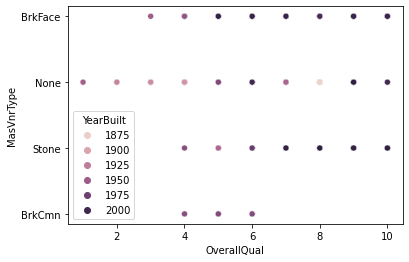

In [724]:
sns.scatterplot(x="OverallQual", y='MasVnrType', hue="YearBuilt", data=raw_df)

In [725]:
#test_obj.MasVnrType.fillna(-1, inplace=True)
dictionary = {"MasVnrType":{"None":0,"BrkCmn":1, "BrkFace":2, "Stone":3}}
test_df = test_df.replace(dictionary)

In [726]:
df.corr()['MasVnrType'][df.corr()['MasVnrType'] >= 0.4] 

OverallQual    0.433052
YearBuilt      0.444813
MasVnrArea     0.657269
SalePrice      0.411798
MasVnrType     1.000000
Name: MasVnrType, dtype: float64

In [727]:
masvnrtypedf = test_df[test_df.MasVnrType.isnull() == True][['MasVnrType','MasVnrArea','OverallQual','YearBuilt']].copy()

In [728]:
masvnrtypedf

,MasVnrType,MasVnrArea,OverallQual,YearBuilt
231,NaN,NaN,8,2002
246,NaN,NaN,7,2008
422,NaN,NaN,7,2002
532,NaN,NaN,7,2002
544,NaN,NaN,8,2006
581,NaN,NaN,7,2002
851,NaN,NaN,6,2007
865,NaN,NaN,7,2003
880,NaN,NaN,7,2007
889,NaN,NaN,8,2007


In [729]:
#(df[(df.OverallQual == 8) & (df.YearBuilt == 2002)].MasVnrType.mean() + test_df[(test_df.OverallQual == 8) & (test_df.YearBuilt == 2002)].MasVnrType.mean())/2
#test_df[['MasVnrType','MasVnrArea']]


for i in range(len(masvnrtypedf.index)):
    OverallQual = masvnrtypedf.iloc[i].OverallQual
    YearBuilt = masvnrtypedf.iloc[i].YearBuilt
    
    mean_type = round((df[(df.OverallQual == OverallQual) & (df.YearBuilt == YearBuilt)].MasVnrType.mean() + test_df[(test_df.OverallQual == OverallQual) & (test_df.YearBuilt == YearBuilt)].MasVnrType.mean())/2)
    mean_area = round((df[(df.OverallQual == OverallQual) & (df.YearBuilt == YearBuilt)].MasVnrArea.mean() + test_df[(test_df.OverallQual == OverallQual) & (test_df.YearBuilt == YearBuilt)].MasVnrArea.mean())/2)
    
    test_df[(test_df.OverallQual == OverallQual) & (test_df.YearBuilt == YearBuilt)].MasVnrType.fillna(mean_type, inplace=True)
    test_df[(test_df.OverallQual == OverallQual) & (test_df.YearBuilt == YearBuilt)].MasVnrArea.fillna(mean_area, inplace=True)


In [730]:
test_df[['MasVnrType']]

,MasVnrType
0,0.0
1,2.0
2,0.0
3,2.0
4,0.0
...,...
1454,0.0
1455,0.0
1456,0.0
1457,0.0


In [731]:
df.corr()['MasVnrArea'][df.corr()['MasVnrArea'] >= 0.4] 

OverallQual    0.411876
MasVnrArea     1.000000
SalePrice      0.477493
MasVnrType     0.657269
Name: MasVnrArea, dtype: float64

In [732]:
test_df[test_df.MasVnrArea.isnull() == True][['MasVnrType','MasVnrArea','OverallQual','YearBuilt']]

,MasVnrType,MasVnrArea,OverallQual,YearBuilt
231,NaN,NaN,8,2002
246,NaN,NaN,7,2008
422,NaN,NaN,7,2002
532,NaN,NaN,7,2002
544,NaN,NaN,8,2006
581,NaN,NaN,7,2002
851,NaN,NaN,6,2007
865,NaN,NaN,7,2003
880,NaN,NaN,7,2007
889,NaN,NaN,8,2007


Şu ana kadar yapılanlar..:<br>
MsVnrArea ve MsVnrType değerlerine ait train ve test datasetlerindeki verilerin OverallQual	YearBuilt kolonlarına göre toplamıp ortalamaları alındı ve Nan değerlere atandı

In [733]:
test_obj.MasVnrType = test_df.MasVnrType.copy()

#### ExterQual & ExterCond

In [734]:
valcount_isnull(test_obj, 'ExterQual')

TA    892
Gd    491
Ex     55
Fa     21
Name: ExterQual, dtype: int64
Null sum..:  0


In [735]:
valcount_isnull(test_obj, 'ExterCond')

TA    1256
Gd     153
Fa      39
Ex       9
Po       2
Name: ExterCond, dtype: int64
Null sum..:  0


In [736]:
dictionary = {"ExterQual":{"Po":1,"Fa":2, "TA":3, "Gd":4, "Ex":5}}
test_obj = test_obj.replace(dictionary)

In [737]:
dictionary = {"ExterCond":{"Po":1,"Fa":2, "TA":3, "Gd":4, "Ex":5}}
test_obj = test_obj.replace(dictionary)

#### Foundation

In [738]:
valcount_isnull(test_obj, 'Foundation')

PConc     661
CBlock    601
BrkTil    165
Slab       25
Stone       5
Wood        2
Name: Foundation, dtype: int64
Null sum..:  0


In [739]:
dictionary = {"Foundation":{"Slab":1,"BrkTil":2, "CBlock":3, "Wood":4, "PConc":5, "Stone":6}}
test_obj = test_obj.replace(dictionary)

#### BsmtQual & BsmtCond & BsmtExposure & BsmtFinType1 & BsmtFinType2

In [740]:
valcount_isnull(test_obj, 'BsmtQual')

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64
Null sum..:  44


In [741]:
test_obj.BsmtQual.fillna(0, inplace=True)
dictionary = {"BsmtQual":{"Po":1,"Fa":2, "TA":3, "Gd":4, "Ex":5}}
test_obj = test_obj.replace(dictionary)

In [742]:
valcount_isnull(test_obj, 'BsmtCond')

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64
Null sum..:  45


In [743]:
test_obj.BsmtCond.fillna(0, inplace=True)
dictionary = {"BsmtCond":{"Po":1,"Fa":2, "TA":3, "Gd":4, "Ex":5}}
test_obj = test_obj.replace(dictionary)

In [744]:
valcount_isnull(test_obj, 'BsmtExposure')

No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64
Null sum..:  44


In [745]:
test_obj.BsmtExposure.fillna(0, inplace=True)
dictionary = {"BsmtExposure":{"No":1,"Mn":2, "Av":3, "Gd":4}}
test_obj = test_obj.replace(dictionary)

In [746]:
valcount_isnull(test_obj, 'BsmtFinType1')

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64
Null sum..:  42


In [747]:
test_obj.BsmtFinType1.fillna(0, inplace=True)
dictionary = {"BsmtFinType1":{"Unf":1,"LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}}
test_obj = test_obj.replace(dictionary)

In [748]:
valcount_isnull(test_obj, 'BsmtFinType2')

Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64
Null sum..:  42


In [749]:
test_obj.BsmtFinType2.fillna(0, inplace=True)
dictionary = {"BsmtFinType2":{"Unf":1,"LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}}
test_obj = test_obj.replace(dictionary)

#### Heating & HeatingQC

In [750]:
valcount_isnull(test_obj, 'Heating')

GasA    1446
GasW       9
Grav       2
Wall       2
Name: Heating, dtype: int64
Null sum..:  0


In [751]:
dictionary = {"Heating":{"Grav":1,"Floor":2, "Wall":3, "OthW":4, "GasA":5, "GasW":6}}
test_obj = test_obj.replace(dictionary)

In [752]:
valcount_isnull(test_obj, 'HeatingQC')

Ex    752
TA    429
Gd    233
Fa     43
Po      2
Name: HeatingQC, dtype: int64
Null sum..:  0


In [753]:
dictionary = {"HeatingQC":{"Po":1,"Fa":2, "TA":3, "Gd":4, "Ex":5}}
test_obj = test_obj.replace(dictionary)

#### CentralAir

In [754]:
valcount_isnull(test_obj, 'CentralAir')

Y    1358
N     101
Name: CentralAir, dtype: int64
Null sum..:  0


In [755]:
dictionary = {"CentralAir":{"N":0,"Y":1}}
test_obj = test_obj.replace(dictionary)

#### Electrical

In [756]:
valcount_isnull(test_obj, 'Electrical')

SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64
Null sum..:  0


In [757]:
dictionary = {"Electrical":{"Mix":1,"FuseP":2,"FuseF":3, "FuseA":4, "SBrkr":5}}
test_obj = test_obj.replace(dictionary)

#### KitchenQual

In [758]:
valcount_isnull(test_obj, 'KitchenQual')

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64
Null sum..:  1


In [759]:
df.corr()['KitchenQual'][df.corr()['KitchenQual'] > 0.4] 

OverallQual     0.673331
YearBuilt       0.530165
YearRemodAdd    0.625316
TotalBsmtSF     0.432630
GrLivArea       0.420563
FullBath        0.434648
GarageYrBlt     0.527013
GarageCars      0.509810
GarageArea      0.489606
SalePrice       0.659600
Neighborhood    0.566358
ExterQual       0.716122
Foundation      0.518235
BsmtQual        0.510938
HeatingQC       0.504228
KitchenQual     1.000000
GarageType      0.400813
GarageFinish    0.474570
Name: KitchenQual, dtype: float64

In [760]:
raw_df[['ExterQual','KitchenQual']]

,ExterQual,KitchenQual
0,Gd,Gd
1,TA,TA
2,Gd,Gd
3,TA,Gd
4,Gd,Gd
...,...,...
1455,TA,TA
1456,TA,TA
1457,Ex,Gd
1458,TA,Gd


In [761]:
test_obj[test_obj.KitchenQual.isnull() == True]['ExterQual']

95    3
Name: ExterQual, dtype: int64

In [762]:
#KitchenQual %71 oranında ExterQual ile korele olduğuundan bu değere göre dolduruldu

In [763]:
test_obj.KitchenQual.fillna(3, inplace=True)
dictionary = {"KitchenQual":{"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}}
test_obj = test_obj.replace(dictionary)

#### Functional

In [764]:
valcount_isnull(test_obj, 'Functional')

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64
Null sum..:  2


In [765]:
df.corr()['Functional'][df.corr()['Functional'] > 0.1] 

OverallQual     0.137160
OverallCond     0.118978
YearBuilt       0.138408
GarageYrBlt     0.126227
SalePrice       0.105996
Neighborhood    0.139698
ExterCond       0.111963
Foundation      0.152563
BsmtQual        0.129048
BsmtCond        0.138740
BsmtFinType1    0.108530
KitchenQual     0.113064
Functional      1.000000
GarageType      0.122352
GarageFinish    0.121698
Name: Functional, dtype: float64

In [766]:
test_obj[test_obj.Functional.isnull() ==True][['Functional']].fillna('Typ', inplace=True)

In [767]:
dictionary = {"Functional":{"Sev":1,"Maj2":2,"Maj1":3, "Mod":4, "Min1":5, "Min2":6, "Typ":7}}
test_obj = test_obj.replace(dictionary)

#### FireplaceQu

In [768]:
valcount_isnull(test_obj, 'FireplaceQu')

Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64
Null sum..:  730


In [769]:
test_obj.FireplaceQu.fillna(0, inplace=True)
dictionary = {"FireplaceQu":{"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}}
test_obj = test_obj.replace(dictionary)

####  GarageType & GarageFinish & GarageQual & GarageCond

In [770]:
valcount_isnull(test_obj, 'GarageType')

Attchd     853
Detchd     392
BuiltIn     98
2Types      17
Basment     17
CarPort      6
Name: GarageType, dtype: int64
Null sum..:  76


In [771]:
test_obj.GarageType.fillna(0, inplace=True)
dictionary = {"GarageType":{"CarPort":1,"Detchd":2,"2Types":3, "Basment":4, "Attchd":5, "BuiltIn":6}}
test_obj = test_obj.replace(dictionary)

In [772]:
valcount_isnull(test_obj, 'GarageFinish')

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64
Null sum..:  78


In [773]:
test_obj.GarageFinish.fillna(0, inplace=True)
dictionary = {"GarageFinish":{"Unf":1,"RFn":2,"Fin":3}}
test_obj = test_obj.replace(dictionary)

In [774]:
valcount_isnull(test_obj, 'GarageQual')

TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64
Null sum..:  78


In [775]:
test_obj.GarageQual.fillna(0, inplace=True)
dictionary = {"GarageQual":{"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}}
test_obj = test_obj.replace(dictionary)

In [776]:
test_obj.GarageCond.fillna(0, inplace=True)
dictionary = {"GarageCond":{"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}}
test_obj = test_obj.replace(dictionary)

#### PavedDrive

In [777]:
valcount_isnull(test_obj, 'PavedDrive')

Y    1301
N     126
P      32
Name: PavedDrive, dtype: int64
Null sum..:  0


In [778]:
dictionary = {"PavedDrive":{"N":1,"P":2,"Y":3}}
test_obj = test_obj.replace(dictionary)

#### PoolQC

In [779]:
valcount_isnull(test_obj, 'PoolQC')

Ex    2
Gd    1
Name: PoolQC, dtype: int64
Null sum..:  1456


In [780]:
test_obj.PoolQC.fillna(0, inplace=True)
dictionary = {"PoolQC":{"Fa":1,"TA":2, "Gd":3, "Ex":4}}
test_obj = test_obj.replace(dictionary)

#### Fence

In [781]:
valcount_isnull(test_obj, 'Fence')

MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: Fence, dtype: int64
Null sum..:  1169


In [782]:
test_obj.Fence.fillna(0, inplace=True)
dictionary = {"Fence":{"MnWw":1,"GdWo":2, "MnPrv":3, "GdPrv":4}}
test_obj = test_obj.replace(dictionary)

#### MiscFeature

In [783]:
valcount_isnull(test_obj, 'MiscFeature')

Shed    46
Gar2     3
Othr     2
Name: MiscFeature, dtype: int64
Null sum..:  1408


In [784]:
test_obj.MiscFeature.fillna(0, inplace=True)
dictionary = {"MiscFeature":{"Othr":1,"Shed":2, "Gar2":3, "TenC":4}}
test_obj = test_obj.replace(dictionary)

#### Dummy Encoding for SaleType-SaleCondition-BldgType-Exterior1st-Exterior2nd-RoofStyle

In [785]:
valcount_isnull(test_obj, 'SaleType')

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64
Null sum..:  1


In [786]:
test_obj[test_obj.SaleType.isnull()==True][['SaleType']].fillna('WD', inplace=True)

In [787]:
valcount_isnull(test_obj, 'Exterior1st')

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64
Null sum..:  1


In [788]:
test_obj[test_obj.Exterior1st.isnull() == True][['Exterior1st']].fillna('VinylSd', inplace=True)

In [789]:
new_df2 = pd.DataFrame()
new_df = test_obj[['BldgType','Exterior1st','Exterior2nd']].copy()

In [790]:
top_10 = [x for x in new_df.BldgType.value_counts().sort_values(ascending=False).head(10).index]
for label in top_10:
    new_df2['BldgType_'+label] = np.where(new_df['BldgType']==label,1,0)
    
new_df2

,BldgType_1Fam,BldgType_TwnhsE,BldgType_Duplex,BldgType_Twnhs,BldgType_2fmCon
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
1454,0,0,0,1,0
1455,0,1,0,0,0
1456,1,0,0,0,0
1457,1,0,0,0,0


In [791]:
top_10 = [x for x in new_df.Exterior1st.value_counts().sort_values(ascending=False).head(10).index]
for label in top_10:
    new_df2['Exterior1st_'+label] = np.where(new_df['Exterior1st']==label,1,0)

In [792]:
top_10 = [x for x in new_df.Exterior2nd.value_counts().sort_values(ascending=False).head(10).index]
for label in top_10:
    new_df2['Exterior2nd_'+label] = np.where(new_df['Exterior2nd']==label,1,0)

In [793]:
test_obj.drop(['BldgType','Exterior1st','Exterior2nd'], axis=1, inplace=True)

In [794]:
test_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1459 non-null   int64  
 1   Street         1459 non-null   int64  
 2   Alley          1459 non-null   int64  
 3   LotShape       1459 non-null   int64  
 4   LandContour    1459 non-null   int64  
 5   Utilities      1459 non-null   int64  
 6   LotConfig      1459 non-null   int64  
 7   LandSlope      1459 non-null   int64  
 8   Neighborhood   1459 non-null   int64  
 9   Condition1     1459 non-null   int64  
 10  Condition2     1459 non-null   int64  
 11  HouseStyle     1459 non-null   int64  
 12  RoofStyle      1459 non-null   object 
 13  RoofMatl       1459 non-null   int64  
 14  MasVnrType     1443 non-null   float64
 15  ExterQual      1459 non-null   int64  
 16  ExterCond      1459 non-null   int64  
 17  Foundation     1459 non-null   int64  
 18  BsmtQual

In [795]:
new_df = test_obj[['RoofStyle','SaleType','SaleCondition']].copy()

In [796]:
new_df3 = pd.get_dummies(new_df, columns = ['RoofStyle','SaleType','SaleCondition'])
new_df3

,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1455,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1456,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1457,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [797]:
test_obj.drop(['RoofStyle','SaleType','SaleCondition'], axis=1, inplace=True)

In [798]:
test_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1459 non-null   int64  
 1   Street        1459 non-null   int64  
 2   Alley         1459 non-null   int64  
 3   LotShape      1459 non-null   int64  
 4   LandContour   1459 non-null   int64  
 5   Utilities     1459 non-null   int64  
 6   LotConfig     1459 non-null   int64  
 7   LandSlope     1459 non-null   int64  
 8   Neighborhood  1459 non-null   int64  
 9   Condition1    1459 non-null   int64  
 10  Condition2    1459 non-null   int64  
 11  HouseStyle    1459 non-null   int64  
 12  RoofMatl      1459 non-null   int64  
 13  MasVnrType    1443 non-null   float64
 14  ExterQual     1459 non-null   int64  
 15  ExterCond     1459 non-null   int64  
 16  Foundation    1459 non-null   int64  
 17  BsmtQual      1459 non-null   int64  
 18  BsmtCond      1459 non-null 

In [799]:
test_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1459 non-null   int64  
 1   Street        1459 non-null   int64  
 2   Alley         1459 non-null   int64  
 3   LotShape      1459 non-null   int64  
 4   LandContour   1459 non-null   int64  
 5   Utilities     1459 non-null   int64  
 6   LotConfig     1459 non-null   int64  
 7   LandSlope     1459 non-null   int64  
 8   Neighborhood  1459 non-null   int64  
 9   Condition1    1459 non-null   int64  
 10  Condition2    1459 non-null   int64  
 11  HouseStyle    1459 non-null   int64  
 12  RoofMatl      1459 non-null   int64  
 13  MasVnrType    1443 non-null   float64
 14  ExterQual     1459 non-null   int64  
 15  ExterCond     1459 non-null   int64  
 16  Foundation    1459 non-null   int64  
 17  BsmtQual      1459 non-null   int64  
 18  BsmtCond      1459 non-null 

In [800]:
test_obj[test_obj.MSZoning.isnull() == True]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature


In [801]:
test_obj.reset_index(inplace=True, drop=True)

In [802]:
new_df2.reset_index(inplace=True, drop=True)

In [803]:
new_df3.reset_index(inplace=True, drop=True)

In [804]:
test_obj = pd.concat([test_obj,new_df2,new_df3], axis=1)

In [805]:
#test_obj = test_obj.astype('Int64')

In [806]:
test_obj.drop(['BldgType_2fmCon'], axis=1, inplace=True)

In [807]:
test_obj

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2,2,0,3,3,1,1,2,10,2,...,0,0,0,1,0,0,0,0,1,0
1,5,2,0,2,3,1,3,2,10,4,...,0,0,0,1,0,0,0,0,1,0
2,5,2,0,2,3,1,1,2,14,4,...,0,0,0,1,0,0,0,0,1,0
3,5,2,0,2,3,1,1,2,14,4,...,0,0,0,1,0,0,0,0,1,0
4,5,2,0,2,2,1,1,2,22,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,2,0,3,3,1,1,2,0,4,...,0,0,0,1,0,0,0,0,1,0
1455,4,2,0,3,3,1,1,2,0,4,...,0,0,0,1,1,0,0,0,0,0
1456,5,2,0,3,3,1,1,2,11,4,...,0,0,0,1,1,0,0,0,0,0
1457,5,2,0,3,3,1,1,2,11,4,...,0,0,0,1,0,0,0,0,1,0


In [808]:
num_df = test_df.select_dtypes(include=['int64','float64']).copy()

In [809]:
num_df.reset_index(inplace=True, drop=True)

In [810]:
test_df_final = pd.concat([num_df, test_obj], axis=1)

In [811]:
test_df_final.drop(['Id'],axis=1, inplace=True)

In [812]:
test_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 119 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(14), int32(24), int64(60), uint8(21)
memory usage: 1010.3 KB


In [813]:
#test_df_final = test_df_final.astype('Int64')

In [814]:
test_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 119 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(14), int32(24), int64(60), uint8(21)
memory usage: 1010.3 KB


In [815]:
test_df_final.to_csv('test_df_final.csv', index=False)

In [816]:
test_obj.to_csv('test_obj_toInt.csv', index=False)

In [817]:
test_obj[['MasVnrType']]

,MasVnrType
0,0.0
1,2.0
2,0.0
3,2.0
4,0.0
...,...
1454,0.0
1455,0.0
1456,0.0
1457,0.0


In [818]:
test_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 119 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(14), int32(24), int64(60), uint8(21)
memory usage: 1010.3 KB


In [819]:
test_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSZoning               1459 non-null   int64  
 1   Street                 1459 non-null   int64  
 2   Alley                  1459 non-null   int64  
 3   LotShape               1459 non-null   int64  
 4   LandContour            1459 non-null   int64  
 5   Utilities              1459 non-null   int64  
 6   LotConfig              1459 non-null   int64  
 7   LandSlope              1459 non-null   int64  
 8   Neighborhood           1459 non-null   int64  
 9   Condition1             1459 non-null   int64  
 10  Condition2             1459 non-null   int64  
 11  HouseStyle             1459 non-null   int64  
 12  RoofMatl               1459 non-null   int64  
 13  MasVnrType             1443 non-null   float64
 14  ExterQual              1459 non-null   int64  
 15  Exte

In [820]:
np.arange(1,7)

array([1, 2, 3, 4, 5, 6])